In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import statsmodels
from pandas_datareader import data
import datetime
import quandl
from statsmodels.tsa.stattools import coint

In [2]:
yield_curve = quandl.get("USTREASURY/YIELD", authtoken="CwXtp7d9an3xcgcgnk14", start_date="2019-01-01")
yield_curve_australia = quandl.get("RBA/F02", authtoken="CwXtp7d9an3xcgcgnk14", start_date="2019-01-01")
yield_curve_germany = quandl.get("BUNDESBANK/BBK01_WT4088", authtoken="CwXtp7d9an3xcgcgnk14", start_date="2019-01-01")
yield_curve_uk = quandl.get("BOE/IUDMNPY", authtoken="CwXtp7d9an3xcgcgnk14", start_date="2019-01-01")
yield_curve_TED_SPREAD = quandl.get("FRED/TEDRATE", authtoken="CwXtp7d9an3xcgcgnk14", start_date="2019-01-01")



In [3]:
yield_curve.tail()

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,,
2019-06-25,2.11,2.12,2.12,2.10,1.93,1.71,1.67,1.73,1.86,2.00,2.31,2.53
2019-06-26,2.11,2.12,2.15,2.12,1.96,1.77,1.74,1.80,1.92,2.05,2.35,2.57
2019-06-27,2.19,2.15,2.14,2.12,1.93,1.74,1.71,1.76,1.88,2.01,2.31,2.52
2019-06-28,2.18,2.15,2.12,2.09,1.92,1.75,1.71,1.76,1.87,2.00,2.31,2.52
2019-07-01,2.17,2.16,2.21,2.10,1.94,1.78,1.74,1.79,1.90,2.03,2.34,2.55


In [4]:
yield_curve_australia.tail()

,Australian Government 2 year bond. Units: Per cent per annum; Series ID: FCMYGBAG2D,Australian Government 3 year bond. Units: Per cent per annum; Series ID: FCMYGBAG3D,Australian Government 5 year bond. Units: Per cent per annum; Series ID: FCMYGBAG5D,Australian Government 10 year bond. Units: Per cent per annum; Series ID: FCMYGBAG10D,Australian Government Indexed Bond. Units: Per cent per annum; Series ID: FCMYGBAGID,NSW Treasury Corporation 3 year bond. Units: Per cent per annum; Series ID: FCMYGBNT3D,NSW Treasury Corporation 5 year bond. Units: Per cent per annum; Series ID: FCMYGBNT5D,NSW Treasury Corporation 10 year bond. Units: Per cent per annum; Series ID: FCMYGBNT10D
Date,,,,,,,,
2019-06-21,0.905,0.890,0.960,1.280,0.295,1.105,1.255,1.795
2019-06-24,0.915,0.900,0.975,1.295,0.300,1.115,1.265,1.820
2019-06-25,0.900,0.895,0.965,1.280,0.300,1.105,1.255,1.815
2019-06-26,0.940,0.920,0.985,1.280,0.335,1.130,1.275,1.790
2019-06-27,0.980,0.965,1.040,1.345,0.405,1.160,1.310,1.850


In [5]:
yield_curve_germany.tail()

,Value
Date,
2019-06-25,-0.72
2019-06-26,-0.72
2019-06-27,-0.71
2019-06-28,-0.71
2019-07-01,-0.72


In [6]:
yield_curve_uk.tail()

,Value
Date,
2019-06-21,0.9069
2019-06-24,0.8730
2019-06-25,0.9045
2019-06-26,0.8865
2019-06-27,0.9283


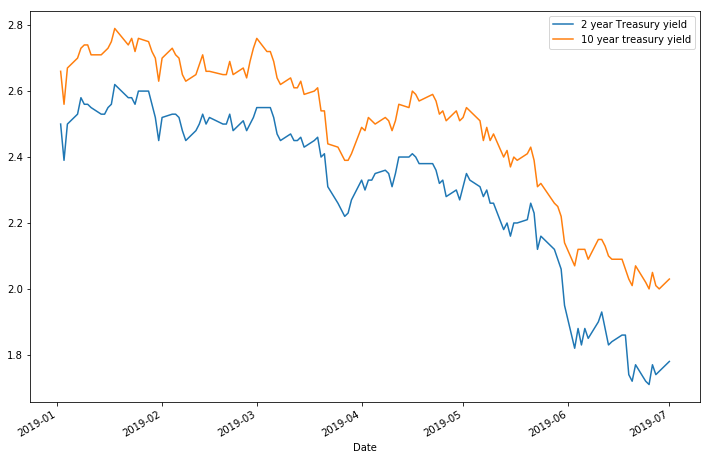

In [7]:
yield_curve['2 YR'].plot(label='2 year Treasury yield',figsize=(12,8))
yield_curve['10 YR'].plot(label='10 year treasury yield')
plt.legend();

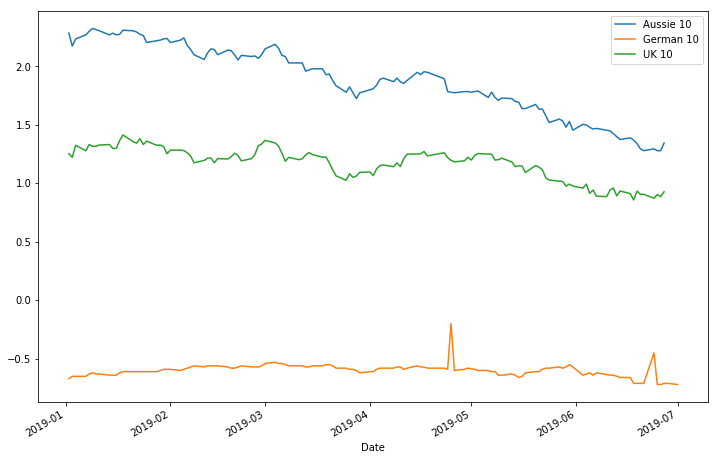

In [8]:
yield_curve_australia['Australian Government 10 year bond. Units: Per cent per annum; Series ID: FCMYGBAG10D'].plot(label= 'Aussie 10', figsize=(12,8))
yield_curve_germany['Value'].plot(label='German 10')
yield_curve_uk['Value'].plot(label='UK 10')
plt.legend();

# TED Spread

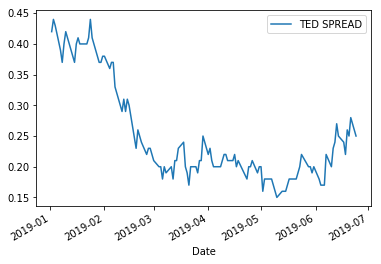

In [9]:
yield_curve_TED_SPREAD['Value'].plot(label='TED SPREAD')
plt.legend();

In [10]:
yield_curve_TED_SPREAD.tail()

,Value
Date,
2019-06-18,0.22
2019-06-19,0.26
2019-06-20,0.25
2019-06-21,0.28
2019-06-24,0.25


In [11]:
z0 = yield_curve['2 YR']
z1 = yield_curve['10 YR']

In [12]:
y_aussie = yield_curve_australia['Australian Government 10 year bond. Units: Per cent per annum; Series ID: FCMYGBAG10D']
y_germany = yield_curve_germany['Value']
y_uk = yield_curve_uk['Value']

# Augmented Engle-Granger two-step cointegration test

In [13]:
t_stat_summary = statsmodels.tsa.stattools.coint(z0, z1, trend='c', method='aeg', maxlag=None, autolag='aic', return_results=True)

In [14]:
print('Cointegration test USA 10-2')
print('----------------------------------------')
print('T-stat for the pair 2-Year-T-notes VS 10-Year-T-notes:', t_stat_summary[0])
print('Alpha value for the T-stat                           :{} ' .format(t_stat_summary[1]))
print('--------------------------------------')
print('Critical value 99%:  {}'.format(t_stat_summary[2][0]))
print('Critical value 95%:  {}'.format(t_stat_summary[2][1]))
print('Critical value 90%:  {}'.format(t_stat_summary[2][2]))

Cointegration test USA 10-2
----------------------------------------
T-stat for the pair 2-Year-T-notes VS 10-Year-T-notes: -4.240247759316569
Alpha value for the T-stat                           :0.0031672950464776794 
--------------------------------------
Critical value 99%:  -3.986942250260146
Critical value 95%:  -3.385848743496358
Critical value 90%:  -3.0788301248699272


In [15]:
np.corrcoef(yield_curve['2 YR'],yield_curve['10 YR'])

array([[1.        , 0.99396554],
       [0.99396554, 1.        ]])

In [16]:
np.cov(yield_curve['2 YR'],yield_curve['10 YR'])

array([[0.06566823, 0.05794337],
       [0.05794337, 0.0517499 ]])

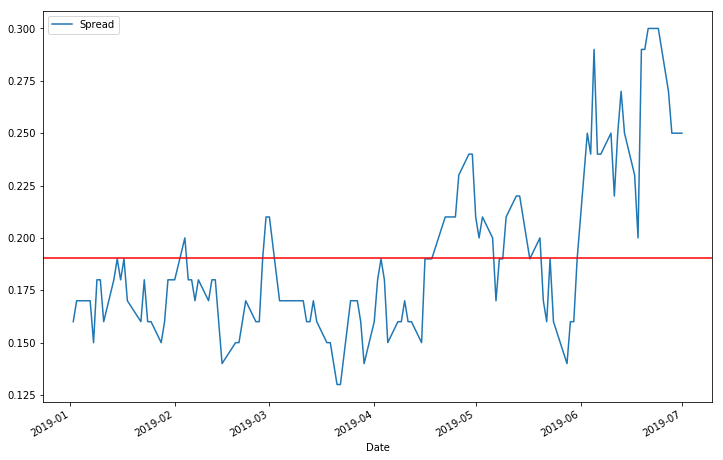

In [17]:
#Yield spread USA
spread_yield = yield_curve['10 YR'] - yield_curve['2 YR']
spread_yield.plot(label='Spread',figsize=(12,8))
plt.axhline(spread_yield.mean(),c='r')
plt.legend();

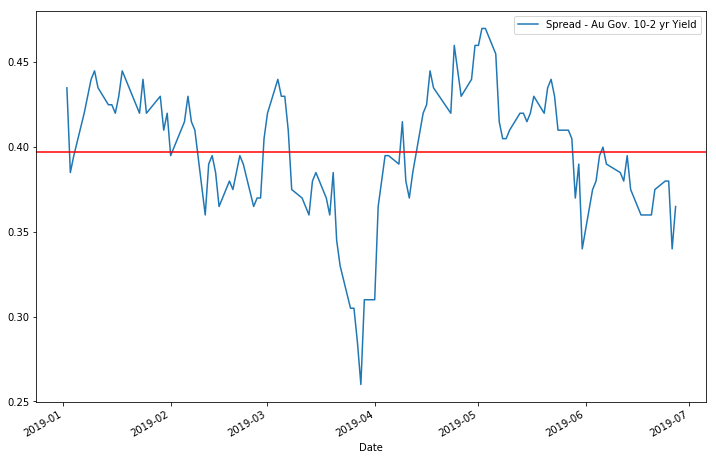

In [18]:
#Yield Spread AUTRALIA
spread_yield_au = yield_curve_australia['Australian Government 10 year bond. Units: Per cent per annum; Series ID: FCMYGBAG10D'] - yield_curve_australia['Australian Government 2 year bond. Units: Per cent per annum; Series ID: FCMYGBAG2D']
spread_yield_au.plot(label='Spread - Au Gov. 10-2 yr Yield',figsize=(12,8))
plt.axhline(spread_yield_au.mean(),c='r')
plt.legend();

In [19]:
def zscore_yield(yield_curve):
    return (yield_curve - yield_curve.mean()) / np.std(yield_curve)

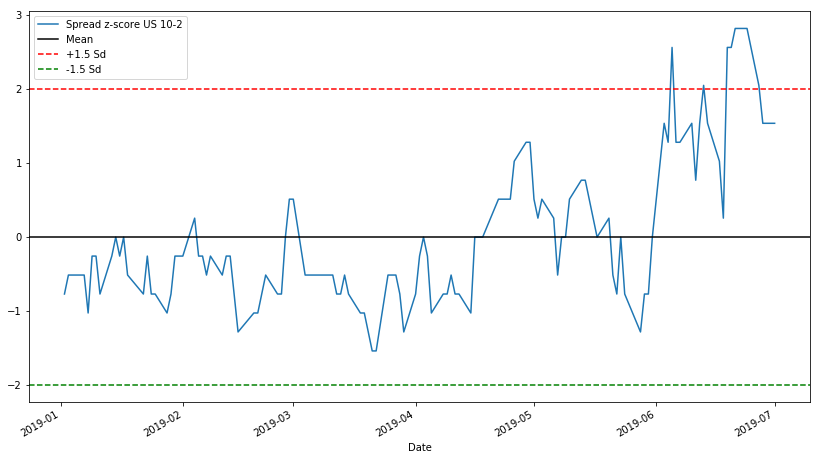

In [20]:
zscore_yield(spread_yield).plot(figsize=(14,8))
plt.axhline(zscore_yield(spread_yield).mean(), color='black')
plt.axhline(2.0, c='r', ls='--')
plt.axhline(-2.0, c='g', ls='--')
plt.legend(['Spread z-score US 10-2', 'Mean', '+1.5 Sd', '-1.5 Sd']);

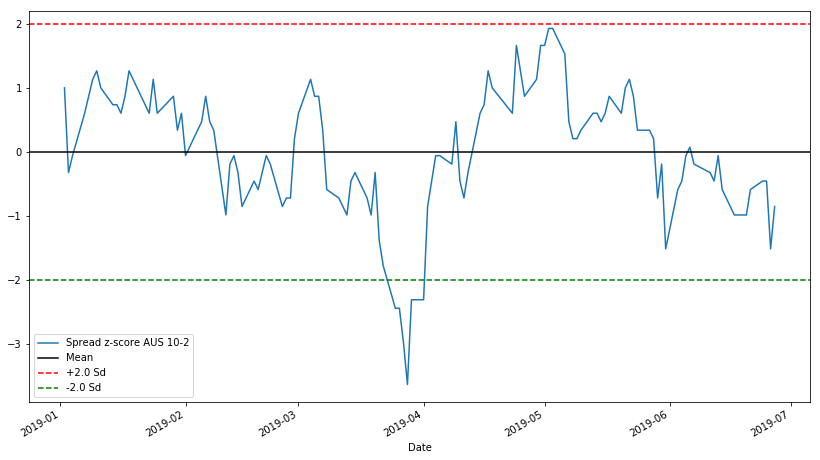

In [21]:
zscore_yield(spread_yield_au).plot(figsize=(14,8))
plt.axhline(zscore_yield(spread_yield_au).mean(), color='black')
plt.axhline(2.0, c='r', ls='--')
plt.axhline(-2.0, c='g', ls='--')
plt.legend(['Spread z-score AUS 10-2', 'Mean', '+2.0 Sd', '-2.0 Sd']);

# USA Treasury 10-2 year spread

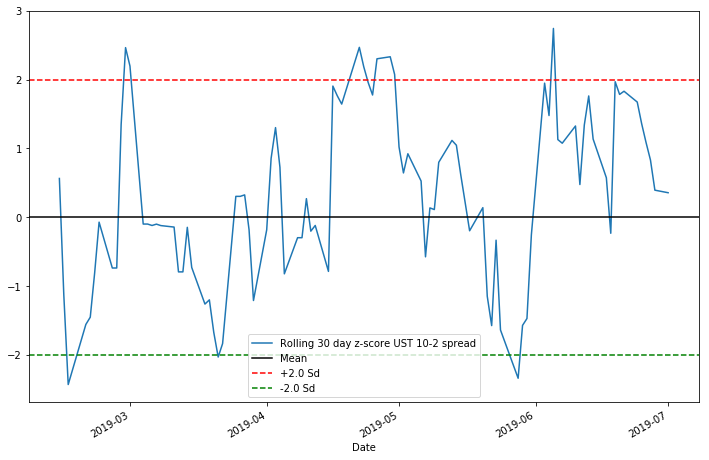

In [22]:
#1 day moving average of the price spread
spread_mavg_yield = spread_yield.rolling(1).mean()

# 30 day moving average of the price spread
spread_mavg30_yield = spread_yield.rolling(30).mean()

# Take a rolling 30 day standard deviation
std_30_yield = spread_yield.rolling(30).std()

# Compute the z score for each day
zscore_30_yield = (spread_mavg_yield - spread_mavg30_yield)/std_30_yield



zscore_30_yield.plot(figsize=(12,8),label='Rolling 30 day Z score')
plt.axhline(0, color='black')
plt.axhline(2.0, color='red', linestyle='--')
plt.axhline(-2.0, color='green',linestyle='--')
plt.legend(['Rolling 30 day z-score UST 10-2 spread', 'Mean', '+2.0 Sd', '-2.0 Sd']);

# AU government 10Yr and 2Yr Spead

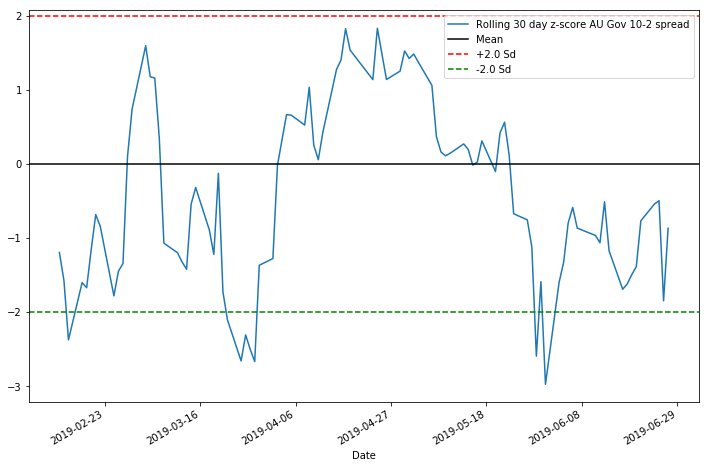

In [23]:
#1 day moving average of the price spread
spread_mavg_yield_au = spread_yield_au.rolling(1).mean()

# 30 day moving average of the price spread
spread_mavg30_yield_au = spread_yield_au.rolling(30).mean()

# Take a rolling 30 day standard deviation
std_30_yield_au = spread_yield_au.rolling(30).std()

# Compute the z score for each day
zscore_30_yield_au = (spread_mavg_yield_au - spread_mavg30_yield_au)/std_30_yield_au



zscore_30_yield_au.plot(figsize=(12,8),label='Rolling 30 day Z score for AU GOV bonds')
plt.axhline(0, color='black')
plt.axhline(2.0, color='red', linestyle='--')
plt.axhline(-2.0, color='green',linestyle='--')
plt.legend(['Rolling 30 day z-score AU Gov 10-2 spread', 'Mean', '+2.0 Sd', '-2.0 Sd']);

In [24]:
zscore_30_yield

Date
2019-01-02         NaN
2019-01-03         NaN
2019-01-04         NaN
2019-01-07         NaN
2019-01-08         NaN
2019-01-09         NaN
2019-01-10         NaN
2019-01-11         NaN
2019-01-14         NaN
2019-01-15         NaN
2019-01-16         NaN
2019-01-17         NaN
2019-01-18         NaN
2019-01-22         NaN
2019-01-23         NaN
2019-01-24         NaN
2019-01-25         NaN
2019-01-28         NaN
2019-01-29         NaN
2019-01-30         NaN
2019-01-31         NaN
2019-02-01         NaN
2019-02-04         NaN
2019-02-05         NaN
2019-02-06         NaN
2019-02-07         NaN
2019-02-08         NaN
2019-02-11         NaN
2019-02-12         NaN
2019-02-13    0.562974
                ...   
2019-05-20    0.139044
2019-05-21   -1.148407
2019-05-22   -1.573744
2019-05-23   -0.333380
2019-05-24   -1.637913
2019-05-28   -2.338467
2019-05-29   -1.570545
2019-05-30   -1.470817
2019-05-31   -0.256381
2019-06-03    1.947229
2019-06-04    1.476923
2019-06-05    2.741520
2019-0